In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [3]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [5]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']

#### Scaling the data

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 56)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [7]:
#importing Decision tree and metric accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Creating instance of Tree

tree =  DecisionTreeClassifier()

# Fitting the model
tree.fit(train_x, train_y)

# Predicting over the Test Set and accuracy-score
test_predict = tree.predict(test_x)
k = accuracy_score(test_y, test_predict)
print('Test accuracy_score    ', k)
k = precision_score(test_y, test_predict)
print('Test precision_score    ', k)
k = recall_score(test_y, test_predict)
print('Test recall_score    ', k)

Test accuracy_score     0.7705274605764002
Test precision_score     0.4355628058727569
Test recall_score     0.48194945848375453


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [8]:
dp_list = [i for i in range(3,30)]
train = []
test = []

for depth in dp_list:
    # Initialize DecisionTreeClassifier with max_depth
    tree = DecisionTreeClassifier(max_depth=depth)
    
    # Fit the model
    tree.fit(train_x, train_y)
    
    # Predictions
    train_pred = tree.predict(train_x)
    test_pred = tree.predict(test_x)
    
    # Calculate accuracies
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)
    
    # Append accuracies to lists
    train.append(train_acc)
    test.append(test_acc)

# Create DataFrame to store performance
performance = pd.DataFrame({'max_depth': dp_list, 'Train_acc': train, 'Test_acc': test})


performance

,max_depth,Train_acc,Test_acc
0,3,0.842961,0.833424
1,4,0.850634,0.842306
2,5,0.858248,0.838862
3,6,0.864834,0.837593
4,7,0.873535,0.835962
5,8,0.882296,0.831430
6,9,0.896314,0.829074
7,10,0.908036,0.829255
8,11,0.920302,0.824180
9,12,0.930030,0.820011


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

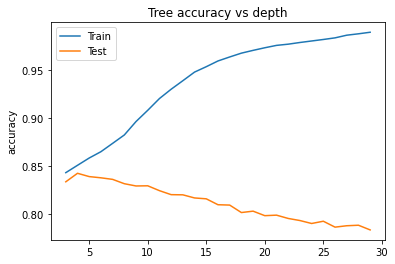

In [9]:
plt.plot(range(3,30), train, label='Train')
plt.plot(range(3,30),test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

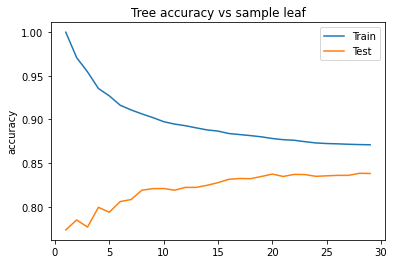

In [10]:
sam_list = [i for i in range(1,30)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier(min_samples_leaf = sam )
    tree.fit(train_x, train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y, trainpred)
    test_acc = accuracy_score(test_y, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_leaf': sam_list,'Train_acc':train,'Test_acc':test})
performance

plt.plot(sam_list,train, label='Train')
plt.plot(sam_list,test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample leaf')
plt.show()



Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

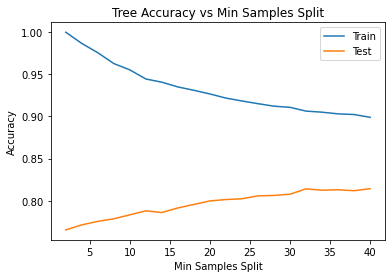

In [11]:
sam_list = [i for i in range(2, 41, 2)]

# Initialize empty lists to store train and test accuracies
train = []
test = []

# Assuming you have already defined your train and test data: train_x, train_y, test_x, test_y

for sam in sam_list:
    # Initialize DecisionTreeClassifier with min_samples_split
    tree = DecisionTreeClassifier(min_samples_split=sam)
    
    # Fit the model
    tree.fit(train_x, train_y)
    
    # Predictions
    train_pred = tree.predict(train_x)
    test_pred = tree.predict(test_x)
    
    # Calculate accuracies
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)
    
    # Append accuracies to lists
    train.append(train_acc)
    test.append(test_acc)

# Create DataFrame to store performance
performance = pd.DataFrame({'min_samples_split': sam_list, 'Train_acc': train, 'Test_acc': test})

# Plotting
plt.plot(sam_list, train, label='Train')
plt.plot(sam_list, test, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Split')
plt.title('Tree Accuracy vs Min Samples Split')
plt.show()

Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [12]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold


i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(??,??):
    print('\n{} of kfold {}'.format(??,??))   
    xtr,xvl = data_x.loc[??],data_x.loc[??]     
    ytr,yvl = data_y[??],data_y[??]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(??,??)     
    pred_test = model.predict(??)     
    score = accuracy_score(??,??) 
    accuracy_list.append(??)
    print('accuracy_score',??)     
    ??
    
print("Mean accuracy across the fold is : ",??)    
    

SyntaxError: invalid syntax (2516072433.py, line 9)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
accuracy_list = []

# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(data_x, data_y)):
    print('\n{} of kfold {}'.format(i+1, kf.n_splits))
    xtr, xvl = data_x.loc[train_index], data_x.loc[test_index]
    ytr, yvl = data_y[train_index], data_y[test_index]
    
    # Initialize Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=1)
    
    # Fit the model
    model.fit(xtr, ytr)
    
    # Make predictions on test set
    pred_test = model.predict(test_x)
    
    # Calculate accuracy score
    score = accuracy_score(test_y, pred_test)
    accuracy_list.append(score)
    
    print('Accuracy Score:', score)

# Calculate mean accuracy across all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print("Mean accuracy across the fold is:", mean_accuracy)



1 of kfold 5


C:\Users\karma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.20083378647815842

2 of kfold 5


C:\Users\karma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.7991662135218416

3 of kfold 5


C:\Users\karma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.7991662135218416

4 of kfold 5


C:\Users\karma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.7991662135218416

5 of kfold 5
Accuracy Score: 0.20518397679898495
Mean accuracy across the fold is: 0.5607032807685337


C:\Users\karma\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
